# Project Name and Description

## Contents
1. Frame the problem  and look at the big picture
2. Get the data
3. Explore and visualize the data to gain insights
4. Prepare the data to better expose the underlying patterns to machine learning algorithm
5. Explore many modesl; Select a model and train it
6. Fine-tune the model
7. Present your solution
8. Launch, monitor and maintain your system



# 1. Frame the problem

TODO

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_33869/1816957955.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Sklearn imports
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

In [3]:
# Custom-made utilities
from src.data_retrieval import fetch_data
from src.utilities import save_fig

In [37]:
# Some plotting settings
plt.rc('font', size=11)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=9)
plt.rc('ytick', labelsize=9)

# 2. Getting the data

In [5]:
# Load data
df_full = df = fetch_data()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df[df['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
182,-118.27,34.04,13.0,1784.0,NaN,2158.0,682.0,1.7038,118100.0,<1H OCEAN
327,-117.65,34.04,15.0,3393.0,NaN,2039.0,611.0,3.9336,151000.0,INLAND
366,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,271800.0,NEAR OCEAN
477,-117.99,34.14,30.0,2346.0,NaN,1988.0,474.0,2.5625,153000.0,INLAND
495,-114.59,34.83,41.0,812.0,NaN,375.0,158.0,1.7083,48500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
19880,-118.23,33.94,36.0,1110.0,NaN,1417.0,302.0,2.3333,92100.0,<1H OCEAN
19952,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20088,-119.73,36.83,8.0,3602.0,NaN,1959.0,580.0,5.3478,138800.0,INLAND
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN


In [7]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


'images/distributions of numerical variables.png'

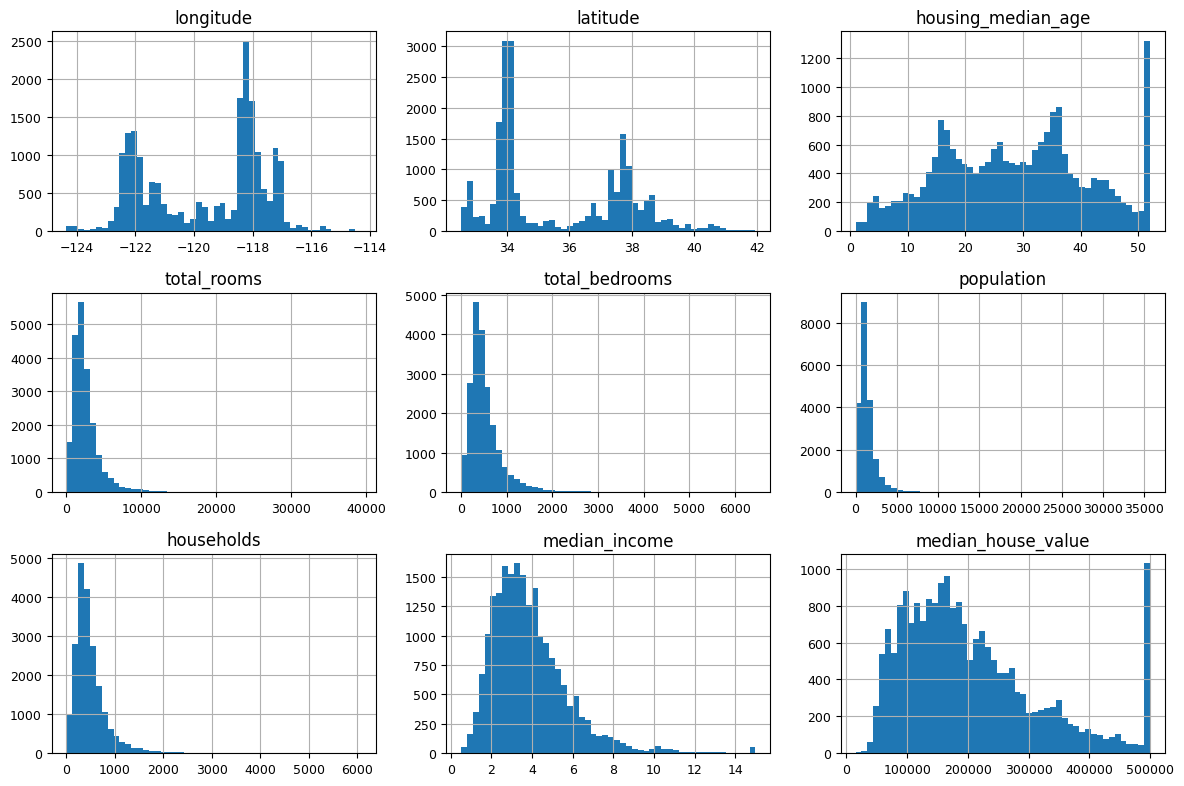

In [9]:
df.hist(bins=50, figsize=(12, 8))
save_fig("distributions of numerical variables")

## Train Test Split
Domain knowledge: because `median income` is important in predicting the target, the train-test split must be stratified on that feature.

In [10]:
# Make income category (temporary)
income_cat = pd.cut(df['median_income'],
                    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                    right=False,
                    labels=[1, 2, 3, 4, 5])

'images/income categories.png'

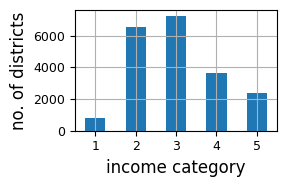

In [17]:
# Vizualise the categories
income_cat.value_counts().sort_index().plot.bar(rot=0, grid=True, figsize=(3,2))
plt.xlabel("income category")
plt.ylabel("no. of districts")
save_fig("income categories")

## Stratified split demo


In [12]:
# Generate 7 different stratified splits
splitter = StratifiedShuffleSplit(n_splits=7, test_size=0.2, random_state=42)

stratified_data_splits = []

for train_idx, test_idx in splitter.split(df_full, income_cat):
    train_set, test_set = df_full.iloc[train_idx], df_full.iloc[test_idx]
    stratified_data_splits.append([train_set, test_set])

print(len(stratified_data_splits), stratified_data_splits[0], sep="\n\n")

7

[       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17449    -122.29     38.00                16.0       4986.0          1081.0   
17064    -118.01     33.86                29.0       2307.0           452.0   
17341    -121.56     38.58                32.0       2070.0           561.0   
7160     -121.94     38.37                17.0       7973.0          1591.0   
20462    -118.10     34.08                21.0       1349.0           352.0   
...          ...       ...                 ...          ...             ...   
14471    -117.11     32.69                37.0       2395.0           627.0   
20081    -117.20     33.70                23.0       6323.0          1196.0   
18541    -122.14     40.07                31.0       2053.0           465.0   
19715    -118.36     33.94                39.0       1390.0           410.0   
3724     -117.23     33.96                 5.0       9179.0          1361.0   

       population  households  median_income  m

## Actual split

In [13]:
# Stratified splits
train_set, test_set = train_test_split(df_full, test_size=0.2, stratify=income_cat, random_state=42)

# 3. Explore the data

In [14]:
# 1. Put away the test set
test_set.to_csv("data/test_set.csv")

# 2. Also, save the train set
train_set.to_csv("data/train_set.csv")

# 2. Make an exploration subset
df = df_exploration = housing = train_set.copy()  # full because len(train_set) is small

'images/California.png'

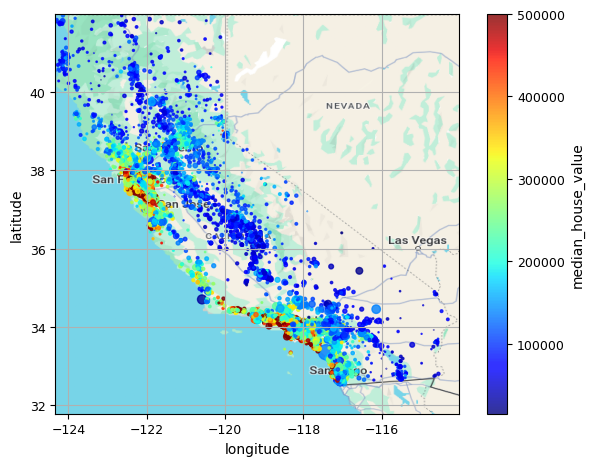

In [47]:
# Visualize on the map
extent = [-124.34,-114.02, 31.78,41.99]  # photo extent

df.plot(kind='scatter', x='longitude', y='latitude', grid=True,
        s=df['population'] / 300, c='median_house_value', cmap='jet', colorbar=True, alpha=0.8,
        legend=True, sharex=True)
plt.axis(extent)

pn = plt.imread("images/[-124.34,-114.02,31.78,41.99].png")  # (553, 444, 4)
plt.imshow(pn, extent=extent)
save_fig("California")

/tmp/ipykernel_33869/2695638084.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dbscan['cluster'] = dbscan.fit_predict(df_dbscan)


cluster
 1    7148
 0    3802
-1    2113
 2    1360
 4    1271
 3     610
 5     208
Name: count, dtype: int64

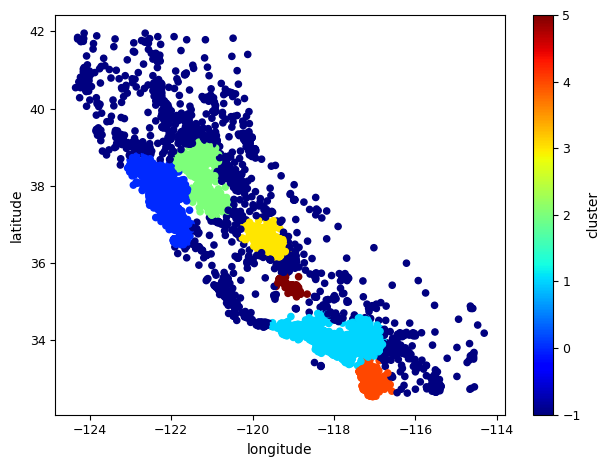

In [79]:
# Experiment with DBSCAN
df_dbscan = df[['longitude', 'latitude']]


from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.25, min_samples=150, metric='euclidean')
df_dbscan['cluster'] = dbscan.fit_predict(df_dbscan)
df_dbscan.plot(kind='scatter', x='longitude', y='latitude', c='cluster', cmap='jet')
save_fig("DBSCAN")
df_dbscan['cluster'].value_counts()

In [86]:
df_dbscan.groupby('cluster').mean()

,longitude,latitude
cluster,,
-1,-120.263805,37.255542
0,-122.180913,37.676383
1,-118.101045,33.992557
2,-121.261485,38.256860
3,-119.664918,36.641721
4,-117.117773,32.855688
5,-119.029808,35.379135


In [85]:
dir(dbscan)[-20:]

['_validate_params',
 'algorithm',
 'components_',
 'core_sample_indices_',
 'eps',
 'feature_names_in_',
 'fit',
 'fit_predict',
 'get_metadata_routing',
 'get_params',
 'labels_',
 'leaf_size',
 'metric',
 'metric_params',
 'min_samples',
 'n_features_in_',
 'n_jobs',
 'p',
 'set_fit_request',
 'set_params']